<a href="https://colab.research.google.com/github/DaniilAszn/Bank_customer_churn_analysis/blob/main/BankChurnAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BankChurnAnalysis.**

## **Введение**

**Этапы работы:**
* Обработка данных
* Разведочный анализ данных
* Обучение моделей
* Оценка качества классификации
* Калибровка моделей

**Описание данных:**
* RowNumber — номер строки
* CustomerId — id клиента
* Surname — фамилия
* First Name — имя
* Date of Birth — дата рождения
* Gender — гендер
* Marital Status — семейное положение
* Number of Dependents — количество иждивенцев
* Income — доход
* Education Level — уровень образования
* Contact Information — контактная информация
* Customer Tenure — срок погашения кредита
* Customer Segment — потребительский сегмент
* Preferred Communication Channel — предпочтительный канал связи
* Credit Score — кредитный рейтинг
* Credit History Length — продолжительность кредитной истории
* Outstanding Loans — непогашенные кредиты
* Churn Flag — факт оттока
* Balance — баланс
* NumOfProducts — количество продуктов
* NumComplaints — множество жалоб

Подключение необходимых библиотек

In [4]:
# для математики
import math as m
import numpy as np

# для датафреймов
import pandas as pd

# для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

# для дат
from datetime import datetime

# для обработки выбросов
from sklearn.ensemble import IsolationForest

# для подсчёта
from collections import Counter

# для баланса классов
from imblearn.over_sampling import SMOTE

# для разделения выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

# для отбора признаков
from sklearn.feature_selection import SelectFromModel

# для моделей
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# для метрик качества классификации
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import brier_score_loss

# для калибровки вероятностей
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# скип предупреждений
import warnings
warnings.filterwarnings("ignore")

Загрузка данных

In [5]:
# Подгружаем наш набор данных
df = pd.read_csv("DATA_BankCustomerChurnAnalysis.csv")

In [6]:
# df_export = df.to_csv("DATA_BankCustomerChurnAnalysis.csv")

## **Обработка данных**

### **Первичный осмотр**

In [7]:
# Отображение информации о нём
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       115640 non-null  int64  
 1   RowNumber                        115640 non-null  int64  
 2   CustomerId                       115640 non-null  object 
 3   Surname                          115640 non-null  object 
 4   First Name                       115640 non-null  object 
 5   Date of Birth                    115640 non-null  object 
 6   Gender                           115640 non-null  object 
 7   Marital Status                   115640 non-null  object 
 8   Number of Dependents             115640 non-null  int64  
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Contact Information              115640 non-null  object 
 12  Cu

In [8]:
# Вывод пяти первых строк
df.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Income,...,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
0,0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,77710.14,...,30,Retail,Phone,397,24,41959.74,0,211359.05,1,0
1,1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,58209.87,...,27,SME,Email,665,10,8916.67,0,30624.76,4,1
2,2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,9794.01,...,14,Retail,Email,715,21,43270.54,0,111956.61,2,6
3,3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,15088.98,...,23,Corporate,Phone,747,17,17887.65,0,201187.61,1,0
4,4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,60726.56,...,22,Corporate,Email,549,25,32686.84,0,60391.24,5,6


In [9]:
# Сводная информация
df.describe()

,Unnamed: 0,RowNumber,Number of Dependents,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,57819.500000,57820.500000,2.502923,52641.363046,15.490591,574.299775,15.546602,25502.731792,0.121878,124639.209748,2.999274,4.991724
std,33382.536902,33382.536902,1.707249,27429.756390,8.654217,159.067499,8.654630,14127.859827,0.327147,72210.476638,1.411361,3.159283
min,0.000000,1.000000,0.000000,5000.960000,1.000000,300.000000,1.000000,1000.430000,0.000000,1.060000,1.000000,0.000000
25%,28909.750000,28910.750000,1.000000,28857.070000,8.000000,436.000000,8.000000,13226.060000,0.000000,61991.915000,2.000000,2.000000
50%,57819.500000,57820.500000,3.000000,52658.110000,15.000000,574.000000,16.000000,25505.285000,0.000000,124505.890000,3.000000,5.000000
75%,86729.250000,86730.250000,4.000000,76364.157500,23.000000,712.000000,23.000000,37742.250000,0.000000,187122.922500,4.000000,8.000000
max,115639.000000,115640.000000,5.000000,99999.510000,30.000000,850.000000,30.000000,49999.690000,1.000000,249998.910000,5.000000,10.000000


Изучим подробнее каждый признак с типом "object"

In [10]:
# # Цикл с выводом значений для каждого признака с типом "object"
# for col in df.columns:
#     if df[col].dtype == 'object':
#         print(f"Value counts for {col}:")
#         print(df[col].value_counts().sort_values(ascending=False))
#         print()
#         print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
#         print()

### **Преобразование данных**

Преобразуем столбец "Date of Birth" в "Age"

In [11]:
# Преобразование столбца с датой рождения
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# Создание столбца с числом полных лет
currentdate = datetime.strptime('2025-03-01', '%Y-%m-%d')
df['Age'] = currentdate.year - df['Date of Birth'].dt.year

In [12]:
df[['Date of Birth', 'Age']].head() # результат

,Date of Birth,Age
0,1987-08-29,38
1,2000-02-07,25
2,1954-02-03,71
3,1991-01-15,34
4,1992-04-08,33


Закодируем столбцы "Gender", "Preferred Communication Channel" для отображения в 1 и 0 заместо текста

In [13]:
# Кодировка значений столбцов с гендером и предпочтительным каналом связи
binary_encode_cols = {
    'Gender': {
        'Female': 1,
        'Male': 0
        },
    'Preferred Communication Channel': {
        'Email': 1,
        'Phone': 0
        },
}

for col, mapping in binary_encode_cols.items():
    df[col] = df[col].map(mapping)

In [14]:
df[['Gender', 'Preferred Communication Channel']].head() # результат

,Gender,Preferred Communication Channel
0,0,0
1,1,1
2,1,1
3,1,0
4,1,1


С помощью one-hot encoding закодируем столбцы "Marital Status", "Education Level", "Customer Segment"

In [15]:
# Использование one-hot encoding для кодирования категориальных столбцов
one_hot_cols = ['Marital Status', 'Education Level', 'Customer Segment']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=False)

col_to_bool = ["Marital Status_Divorced",
               "Marital Status_Married",
               "Marital Status_Single",
               "Education Level_Bachelor's",
               "Education Level_Diploma",
               "Education Level_High School",
               "Education Level_Master's",
               "Customer Segment_Corporate",
               "Customer Segment_Retail",
               "Customer Segment_SME"]

df[col_to_bool] = df[col_to_bool].astype(int)

In [16]:
df[col_to_bool].head() # результат

,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education Level_Bachelor's,Education Level_Diploma,Education Level_High School,Education Level_Master's,Customer Segment_Corporate,Customer Segment_Retail,Customer Segment_SME
0,1,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,1,1,0,0


### **Очистка данных**

Удалим ненужные столбцы после преобразования данных

In [17]:
col_to_drop = ['Unnamed: 0',
               'RowNumber',
               'CustomerId',
               'Surname',
               'First Name',
               'Date of Birth',
               'Contact Information']

df = df.drop(col_to_drop, axis=1)

Проверка на наличие пропусков

In [18]:
df.isna().sum()

,0
Gender,0
Number of Dependents,0
Income,0
Customer Tenure,0
Preferred Communication Channel,0
Credit Score,0
Credit History Length,0
Outstanding Loans,0
Churn Flag,0
Balance,0


Удаление дубликатов при их наличии

In [19]:
df.drop_duplicates(inplace=True)

Удаление выбросов

In [20]:
col_to_check_outliers = ["Number of Dependents",
                         "Income",
                         "Customer Tenure",
                         "Credit Score",
                         "Credit History Length",
                         "Outstanding Loans",
                         "Balance",
                         "NumOfProducts",
                         "NumComplaints",
                         "Age"]

# Создаем и тренируем Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)  # contamination — предполагаемая доля выбросов
df["anomaly"] = iso_forest.fit_predict(df[col_to_check_outliers])  # Обучаем модель и добавляем метки выбросов

# В столбце 'anomaly':
#  1  - нормальный объект
# -1  - выброс (аномалия)

print(f"Размеры данных до обработки: {df.shape}")

# Удаляем выбросы из DataFrame
df = df[df["anomaly"] == 1].drop(columns=["anomaly"])  # Убираем столбец 'anomaly'

print(f"Размеры данных после удаления выбросов: {df.shape}")

Размеры данных до обработки: (115640, 24)
Размеры данных после удаления выбросов: (114483, 23)


Датафрейм после **обработки данных**

In [21]:
df

,Gender,Number of Dependents,Income,Customer Tenure,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,...,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education Level_Bachelor's,Education Level_Diploma,Education Level_High School,Education Level_Master's,Customer Segment_Corporate,Customer Segment_Retail,Customer Segment_SME
0,0,3,77710.14,30,0,397,24,41959.74,0,211359.05,...,1,0,0,0,0,1,0,0,1,0
1,1,1,58209.87,27,1,665,10,8916.67,0,30624.76,...,0,1,0,0,0,1,0,0,0,1
2,1,1,9794.01,14,1,715,21,43270.54,0,111956.61,...,0,0,1,0,0,1,0,0,1,0
3,1,5,15088.98,23,0,747,17,17887.65,0,201187.61,...,1,0,0,0,0,1,0,1,0,0
4,1,2,60726.56,22,1,549,25,32686.84,0,60391.24,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115635,0,2,15704.15,10,0,350,23,26370.30,1,20804.19,...,1,0,0,0,1,0,0,1,0,0
115636,1,3,75792.62,8,1,721,15,36229.64,0,10041.21,...,0,0,1,0,0,1,0,1,0,0
115637,0,4,30142.28,28,1,773,19,6440.85,0,108833.43,...,0,1,0,0,1,0,0,0,1,0
115638,1,0,58636.06,22,0,584,23,5740.08,0,195548.32,...,0,1,0,0,0,1,0,0,1,0


## **Разведочный анализ данных**

### **Анализ целевой переменной**

In [22]:
# Визуализация круговой диаграммы с демонстрацией распределения классов
value_counts = df['Churn Flag'].value_counts()

fig = go.Figure()

pull = [0]*len(value_counts)
pull[value_counts.tolist().index(value_counts.min())] = 0.1

fig.add_trace(
    go.Pie(
        values=value_counts,
        labels=value_counts.index,
        pull=pull
        )
    )

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
    title="Распределение целевой переменной"
)

fig.show()

# fig.write_image("Disbalance.png")

Приведение к балансу классов с помощью SMOTE

In [23]:
# Разделение датафрейма на признаки и таргет
X = df.drop(['Churn Flag'], axis=1)
y = df['Churn Flag']

In [24]:
# Разделение на обучающую и тестовую выборки перед применением SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
# Применение методов сэмплирования для устранения дисбаланса классов
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [26]:
print("Распределение классов до применения SMOTE:", Counter(y_train))
print("Распределение классов после применения SMOTE:", Counter(y_resampled))

Распределение классов до применения SMOTE: Counter({0: 70426, 1: 9712})
Распределение классов после применения SMOTE: Counter({0: 70426, 1: 70426})


### **Отбор признаков**

Выделение важных признаков с помощью случайного леса

In [27]:
# Создаем модель случайного леса
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель случайного леса
random_forest.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [28]:
# Используем SelectFromModel для отбора признаков
selectorRF = SelectFromModel(estimator=random_forest, threshold='mean', max_features=5, prefit=True)  # фильтруем признаки на основе их важности
selected_features_RF = selectorRF.get_support()  # маска выбранных признаков
selected_features_names_RF = X.columns[selected_features_RF].tolist()  # названия выбранных признаков

print("Выбранные признаки:")
print(selected_features_names_RF)

Выбранные признаки:
['Credit Score', 'Balance', 'NumOfProducts', 'NumComplaints']


In [29]:
# Получаем важности признаков
feature_importances = random_forest.feature_importances_

# Создаем DataFrame для визуализации важностей
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [30]:
# Визуализируем важности признаков
fig = go.Figure(data=[
    go.Bar(
        x=features_df['Feature'],
        y=features_df['Importance'],
        marker_color='orange'
        )
    ])

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
    title="Диаграмма важностей признаков",
    xaxis_title="Признаки",
    yaxis_title="Важность"
)

fig.show()

In [31]:
# Визуализируем только оставшиеся признаки
selected_features_importance = features_df[features_df['Feature'].isin(selected_features_names_RF)]

fig = go.Figure(data=[
    go.Bar(
        x=features_df['Feature'],
        y=selected_features_importance['Importance'],
        marker_color='orange'
        )
    ])

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="White",
    title="Диаграмма важностей отобранных признаков",
    xaxis_title="Признаки",
    yaxis_title="Важность"
)

fig.show()

In [32]:
# Отобранные признаки
selected_features_names = ['Balance', 'NumOfProducts', 'Credit Score', 'NumComplaints']

Далее оценим различные графики признаков для каждого класса

In [33]:
# Сбалансированный датафрейм с отобранными признаками
df_temp = pd.concat([X_resampled[selected_features_names], y_resampled], axis=1)
df_temp

,Balance,NumOfProducts,Credit Score,NumComplaints,Churn Flag
0,138910.790000,5,777,4,0
1,248085.260000,1,668,5,0
2,135567.440000,4,696,5,0
3,60203.490000,5,794,5,0
4,71586.670000,2,451,6,0
...,...,...,...,...,...
140847,9807.173979,4,557,6,1
140848,20527.297176,2,468,4,1
140849,7645.288952,1,519,7,1
140850,47852.776742,1,392,7,1


In [34]:
BINS = 1 + m.ceil(m.log(len(df_temp), 2))

BIN_SIZE = len(df_temp) / BINS

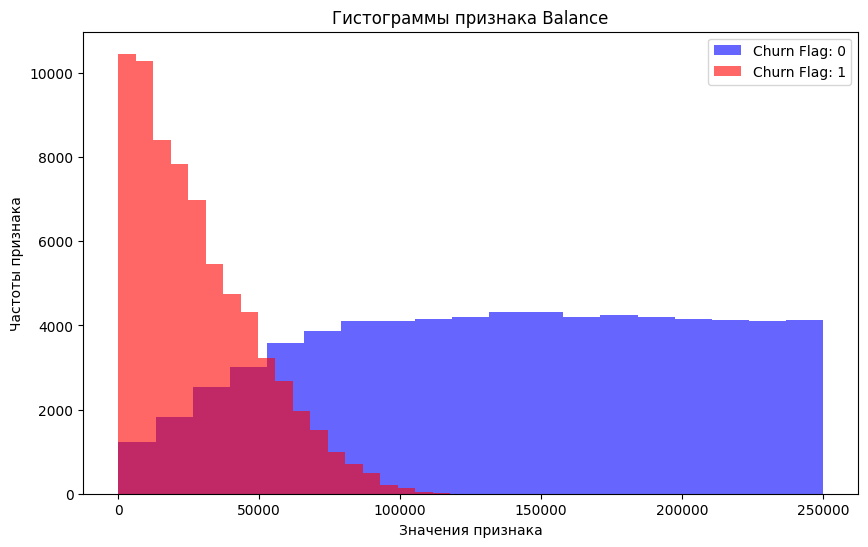

In [35]:
plt.figure(figsize=(10, 6))
plt.title('Гистограммы признака Balance')
plt.hist(df_temp[df_temp['Churn Flag'] == 0]['Balance'], alpha=0.6, label='Churn Flag: 0', color='blue', bins=BINS)
plt.hist(df_temp[df_temp['Churn Flag'] == 1]['Balance'], alpha=0.6, label='Churn Flag: 1', color='red', bins=BINS)
plt.xlabel('Значения признака')
plt.ylabel('Частоты признака')
plt.legend()
plt.show()

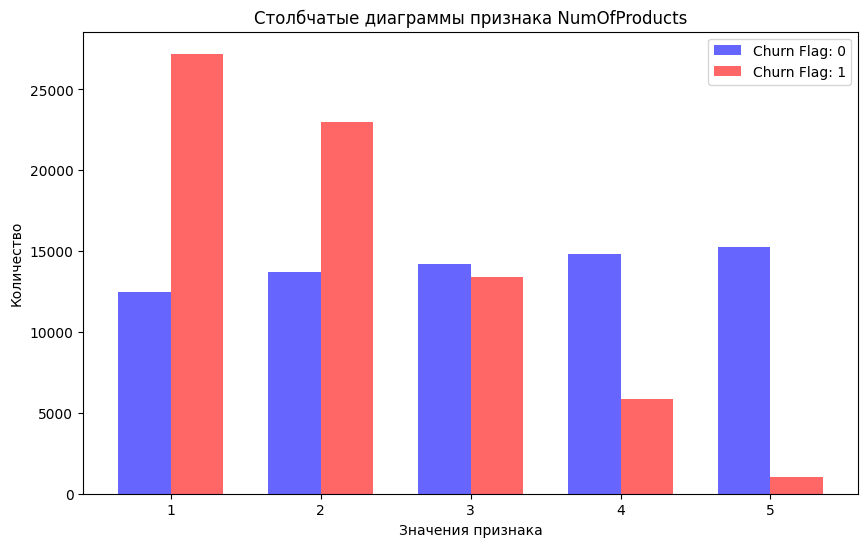

In [36]:
data_0 = df_temp[df_temp['Churn Flag'] == 0]['NumOfProducts']
data_1 = df_temp[df_temp['Churn Flag'] == 1]['NumOfProducts']

unique_values = sorted(set(list(data_0) + list(data_1)))

x_positions = range(1, len(unique_values) + 1)
width = 0.35  # Ширина столбца

plt.figure(figsize=(10, 6))
plt.title('Столбчатые диаграммы признака NumOfProducts')

# Строим столбчатую диаграмму для Churn Flag == 0
plt.bar(
    [i - width/2 for i in x_positions],
    data_0.value_counts().reindex(unique_values).fillna(0),
    width=width,
    align='center',
    alpha=0.6,
    label='Churn Flag: 0',
    color='blue')

# Строим столбчатую диаграмму для Churn Flag == 1
plt.bar(
    [i + width/2 for i in x_positions],
    data_1.value_counts().reindex(unique_values).fillna(0),
    width=width,
    align='center',
    alpha=0.6,
    label='Churn Flag: 1',
    color='red')

plt.xlabel('Значения признака')
plt.ylabel('Количество')
plt.legend()
plt.show()

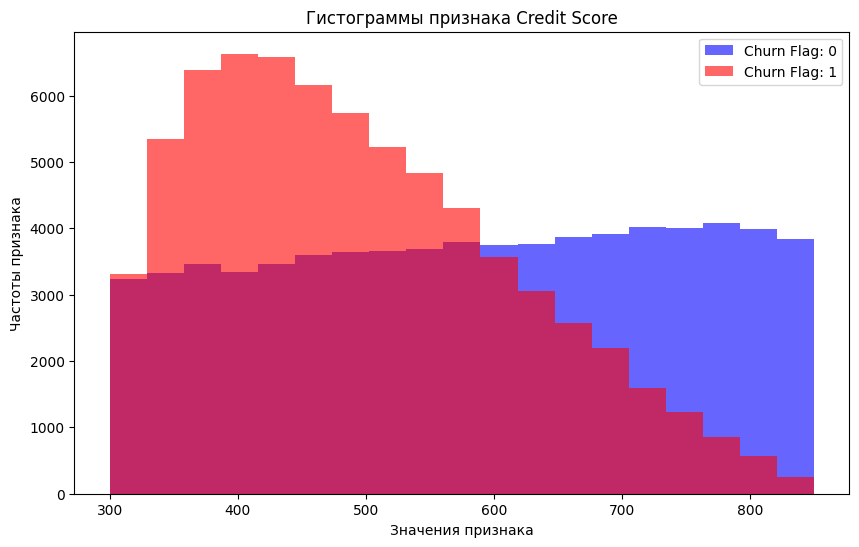

In [37]:
plt.figure(figsize=(10, 6))
plt.title('Гистограммы признака Credit Score')
plt.hist(df_temp[df_temp['Churn Flag'] == 0]['Credit Score'], alpha=0.6, label='Churn Flag: 0', color='blue', bins=BINS)
plt.hist(df_temp[df_temp['Churn Flag'] == 1]['Credit Score'], alpha=0.6, label='Churn Flag: 1', color='red', bins=BINS)
plt.xlabel('Значения признака')
plt.ylabel('Частоты признака')
plt.legend()
plt.show()

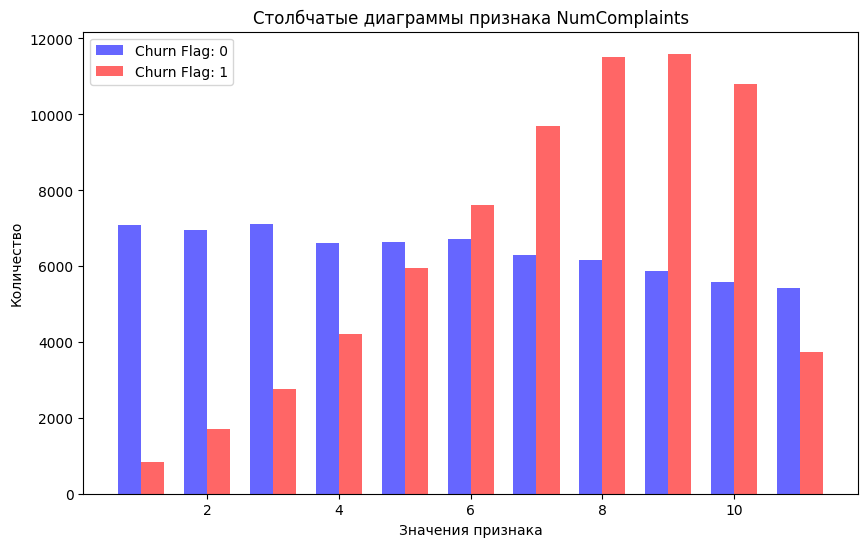

In [38]:
data_0 = df_temp[df_temp['Churn Flag'] == 0]['NumComplaints']
data_1 = df_temp[df_temp['Churn Flag'] == 1]['NumComplaints']

unique_values = sorted(set(list(data_0) + list(data_1)))

x_positions = range(1, len(unique_values) + 1)
width = 0.35  # Ширина столбца

plt.figure(figsize=(10, 6))
plt.title('Столбчатые диаграммы признака NumComplaints')

# Строим столбчатую диаграмму для Churn Flag == 0
plt.bar(
    [i - width/2 for i in x_positions],
    data_0.value_counts().reindex(unique_values).fillna(0),
    width=width,
    align='center',
    alpha=0.6,
    label='Churn Flag: 0',
    color='blue')

# Строим столбчатую диаграмму для Churn Flag == 1
plt.bar(
    [i + width/2 for i in x_positions],
    data_1.value_counts().reindex(unique_values).fillna(0),
    width=width,
    align='center',
    alpha=0.6,
    label='Churn Flag: 1',
    color='red')

plt.xlabel('Значения признака')
plt.ylabel('Количество')
plt.legend()
plt.show()

С помощью корреляционной матрицы проверим насколько сильно отобранные признаки коррелируют друг с другом

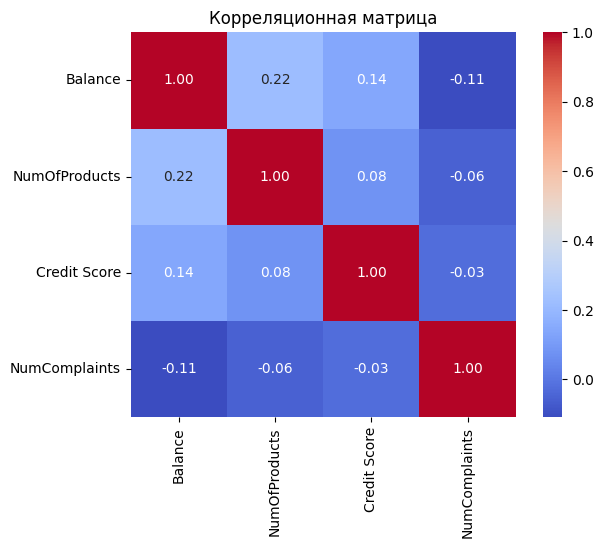

In [39]:
correlation_matrix = X_resampled[selected_features_names].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Корреляционная матрица')
plt.show()

## **Обучение моделей**

### **Baseline**

Обучение модели (Logistic regression)

In [41]:
# Обучение логистической регрессии
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_resampled[selected_features_names], y_resampled)

LogisticRegression(random_state=42)

Обучение модели (Random forest)

In [58]:
# Обучение случайного леса
model_RF = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
model_RF.fit(X_resampled[selected_features_names], y_resampled)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

### **LightGBM**

In [43]:
model_LGBM = lgb.LGBMClassifier(random_state=42)

# Параметры модели: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'reg_lambda': 0.1}
# param_grid = {
#         'n_estimators': [50, 100, 150, 200],          # Количество деревьев
#         'max_depth': [5, 6, 7, 8],                    # Максимальная глубина деревьев
#         'learning_rate': [0.01, 0.05, 0.1],           # Темп обучения
#         'reg_lambda': [0.1, 0.3, 0.5]                 # L2-регуляризация
# }

param_grid = {
        'n_estimators': [200],   # Количество деревьев
        'max_depth': [5],        # Максимальная глубина деревьев
        'learning_rate': [0.05], # Темп обучения
        'reg_lambda': [0.1]      # L2-регуляризация
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model_LGBM,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=cv,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_resampled[selected_features_names], y_resampled)

print("Параметры модели:", grid_search.best_params_)
print("Лучший score на кросс-валидации:", grid_search.best_score_)

model_LGBM = grid_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 70426, number of negative: 70426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 140852, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

## **Оценка качества классификации**

Оценка с помощью метрик: accuracy, precision, recall, f_beta-score, ROC-AUC

In [59]:
predictions_LR = model_LR.predict(X_test[selected_features_names]) # предсказанные метки
y_proba_LR = model_LR.predict_proba(X_test[selected_features_names])[:, 1] # предсказанные вероятности для положительного класса

predictions_RF = model_RF.predict(X_test[selected_features_names]) # предсказанные метки
y_proba_RF = model_RF.predict_proba(X_test[selected_features_names])[:, 1] # предсказанные вероятности для положительного класса

predictions_LGBM = model_LGBM.predict(X_test[selected_features_names]) # предсказанные метки
y_proba_LGBM = model_LGBM.predict_proba(X_test[selected_features_names])[:, 1] # предсказанные вероятности для положительного класса

### **Accuracy**

In [60]:
accuracy = accuracy_score(y_test, predictions_LR)
print("LR Accuracy:", round(accuracy, 6))
print()
accuracy = accuracy_score(y_test, predictions_RF)
print("RF Accuracy:", round(accuracy, 6))
print()
accuracy = accuracy_score(y_test, predictions_LGBM)
print("LGBM Accuracy:", round(accuracy, 6))

LR Accuracy: 0.91335

RF Accuracy: 0.992226

LGBM Accuracy: 0.985384


### **Precision & Recall**

In [61]:
precision = precision_score(y_test, predictions_LR)
recall = recall_score(y_test, predictions_LR)
print("LR Precision:", round(precision, 6))
print("LR Recall:", round(recall, 6))
print()
precision = precision_score(y_test, predictions_RF)
recall = recall_score(y_test, predictions_RF)
print("RF Precision:", round(precision, 6))
print("RF Recall:", round(recall, 6))
print()
precision = precision_score(y_test, predictions_LGBM)
recall = recall_score(y_test, predictions_LGBM)
print("LGBM Precision:", round(precision, 6))
print("LGBM Recall:", round(recall, 6))

LR Precision: 0.597088
LR Recall: 0.876772

RF Precision: 0.951344
RF Recall: 0.986308

LGBM Precision: 0.89733
LGBM Recall: 0.993034


### **F$_\beta$-score**

In [62]:
fbeta = fbeta_score(y_test, predictions_LR, beta=0.5)
print("LR F_beta-score:", round(fbeta, 6))
print()
fbeta = fbeta_score(y_test, predictions_RF, beta=0.5)
print("RF F_beta-score:", round(fbeta, 6))
print()
fbeta = fbeta_score(y_test, predictions_LGBM, beta=0.5)
print("LGBM F_beta-score:", round(fbeta, 6))

LR F_beta-score: 0.637777

RF F_beta-score: 0.958137

LGBM F_beta-score: 0.914966


### **ROC-AUC**

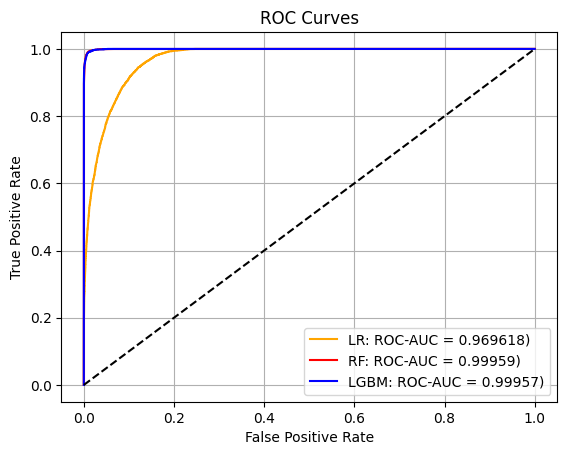

In [63]:
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_proba_LR)
auc_score_LR = roc_auc_score(y_test, y_proba_LR)

fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_proba_RF)
auc_score_RF = roc_auc_score(y_test, y_proba_RF)

fpr_LGBM, tpr_LGBM, thresholds = roc_curve(y_test, y_proba_LGBM)
auc_score_LGBM = roc_auc_score(y_test, y_proba_LGBM)

# Построение ROC-кривых
plt.plot(fpr_LR, tpr_LR, label=f'LR: ROC-AUC = {round(auc_score_LR, 6)})', color='orange')
plt.plot(fpr_RF, tpr_RF, label=f'RF: ROC-AUC = {round(auc_score_RF, 6)})', color='red')
plt.plot(fpr_LGBM, tpr_LGBM, label=f'LGBM: ROC-AUC = {round(auc_score_LGBM, 6)})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()

## **Калибровка моделей**

Несмотря на отличные показатели метрик качества, нам необходимо дополнительно заняться калибровкой предсказаний наших моделей.

Поскольку логистическая регрессия показала себя хуже всех, то её далее мы не будем рассматривать.

### **Метод калибровки: сигмоидальный (калибровка Платта)**

In [64]:
sigmoid_rf = CalibratedClassifierCV(model_RF, cv=cv, method='sigmoid').fit(X_resampled[selected_features_names], y_resampled)
sigmoid_rf_pred = sigmoid_rf.predict_proba(X_test[selected_features_names])[:, 1]
print('RF ROC-AUC:', round(roc_auc_score(y_test, sigmoid_rf_pred), 6))
print()
sigmoid_lgbm = CalibratedClassifierCV(model_LGBM, cv=cv, method='sigmoid').fit(X_resampled[selected_features_names], y_resampled)
sigmoid_lgbm_pred = sigmoid_lgbm.predict_proba(X_test[selected_features_names])[:, 1]
print('LGBM ROC-AUC:', round(roc_auc_score(y_test, sigmoid_lgbm_pred), 6))

RF ROC-AUC: 0.999564

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 46951, number of negative: 46950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 93901, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500005 -> initscore=0.000021
[LightGBM] [Info] Start training from score 0.000021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

### **Метод калибровки: изотоническая регрессия**

In [65]:
isotonic_rf = CalibratedClassifierCV(model_RF, cv=cv, method='isotonic').fit(X_resampled[selected_features_names], y_resampled)
isotonic_rf_pred = isotonic_rf.predict_proba(X_test[selected_features_names])[:, 1]
print('RF ROC-AUC:', round(roc_auc_score(y_test, isotonic_rf_pred), 6))
print()
isotonic_lgbm = CalibratedClassifierCV(model_LGBM, cv=cv, method='isotonic').fit(X_resampled[selected_features_names], y_resampled)
isotonic_lgbm_pred = isotonic_lgbm.predict_proba(X_test[selected_features_names])[:, 1]
print('LGBM ROC-AUC:', round(roc_auc_score(y_test, isotonic_lgbm_pred), 6))

RF ROC-AUC: 0.99956

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 46951, number of negative: 46950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 93901, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500005 -> initscore=0.000021
[LightGBM] [Info] Start training from score 0.000021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

### **Сравнение откалиброванных моделей**

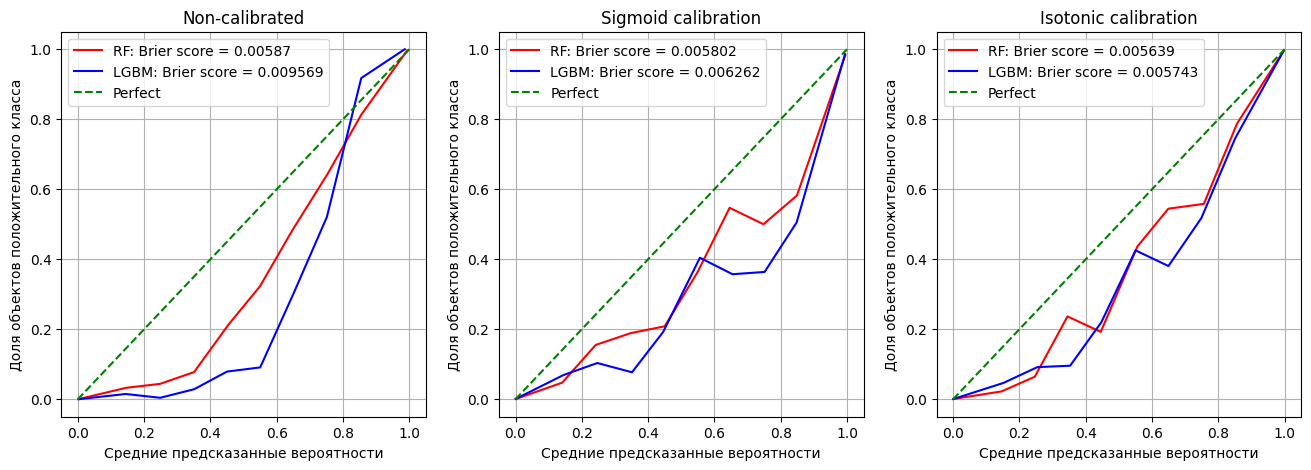

In [66]:
BINS = 10

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

rf_true_prob, rf_pred_prob = calibration_curve(y_test, y_proba_RF, n_bins=BINS)
lgbm_true_prob, lgbm_pred_prob = calibration_curve(y_test, y_proba_LGBM, n_bins=BINS)

y_pred_proba_rf = model_RF.predict_proba(X_test[selected_features_names])[:, 1]
brier_score_RF = round(brier_score_loss(y_test, y_pred_proba_rf), 6)
y_pred_proba_lgbm = model_LGBM.predict_proba(X_test[selected_features_names])[:, 1]
brier_score_LGBM = round(brier_score_loss(y_test, y_pred_proba_lgbm), 6)

axs[0].plot(rf_pred_prob, rf_true_prob, label=f'RF: Brier score = {brier_score_RF}', color='red')
axs[0].plot(lgbm_pred_prob, lgbm_true_prob, label=f'LGBM: Brier score = {brier_score_LGBM}', color='blue')
axs[0].plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
axs[0].set_title('Non-calibrated')

rf_true_prob, rf_pred_prob = calibration_curve(y_test, sigmoid_rf_pred, n_bins=BINS)
lgbm_true_prob, lgbm_pred_prob = calibration_curve(y_test, sigmoid_lgbm_pred, n_bins=BINS)

y_pred_proba_rf = sigmoid_rf.predict_proba(X_test[selected_features_names])[:, 1]
brier_score_RF = round(brier_score_loss(y_test, y_pred_proba_rf), 6)
y_pred_proba_lgbm = sigmoid_lgbm.predict_proba(X_test[selected_features_names])[:, 1]
brier_score_LGBM = round(brier_score_loss(y_test, y_pred_proba_lgbm), 6)

axs[1].plot(rf_pred_prob, rf_true_prob, label=f'RF: Brier score = {brier_score_RF}', color='red')
axs[1].plot(lgbm_pred_prob, lgbm_true_prob, label=f'LGBM: Brier score = {brier_score_LGBM}', color='blue')
axs[1].plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
axs[1].set_title('Sigmoid calibration')

rf_true_prob, rf_pred_prob = calibration_curve(y_test, isotonic_rf_pred, n_bins=BINS)
lgbm_true_prob, lgbm_pred_prob = calibration_curve(y_test, isotonic_lgbm_pred, n_bins=BINS)

y_pred_proba_rf = isotonic_rf.predict_proba(X_test[selected_features_names])[:, 1]
brier_score_RF = round(brier_score_loss(y_test, y_pred_proba_rf), 6)
y_pred_proba_lgbm = isotonic_lgbm.predict_proba(X_test[selected_features_names])[:, 1]
brier_score_LGBM = round(brier_score_loss(y_test, y_pred_proba_lgbm), 6)

axs[2].plot(rf_pred_prob, rf_true_prob, label=f'RF: Brier score = {brier_score_RF}', color='red')
axs[2].plot(lgbm_pred_prob, lgbm_true_prob, label=f'LGBM: Brier score = {brier_score_LGBM}', color='blue')
axs[2].plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')
axs[2].set_title('Isotonic calibration')

for ax in axs:
    ax.set_xlabel('Средние предсказанные вероятности')
    ax.set_ylabel('Доля объектов положительного класса')
    ax.grid()
    ax.legend()

plt.show()

Изотоническая регрессия более успешно смогла откалибровать модели, что видно из оценки Brier score

In [70]:
def predict_probabilities(model, X, y, n_signs=1):
    # Определение вероятности исхода для всех клиентов
    predict_proba = model.predict_proba(X)

    # Выборка вероятностей для ушедших клиентов с
    # округлением значений для укрупненного подсчета
    predict_churn = np.round(predict_proba[:, 1], n_signs)

    # Подсчет количества вероятностей ушедших клиентов
    value_churn = pd.value_counts(predict_churn)

    # Выборка истинных исходов ушедших клиентов
    true_churn = y == 1

    # Определение доли истинных исходов ушедших клиентов
    # или реальная вероятность ухода клиента
    true_proba = [round(np.mean(true_churn[predict_churn == value]), n_signs) for value in value_churn.index]

    # Объединение вероятностей в датафрейм
    result_df = pd.concat([value_churn.reset_index(), pd.Series(true_proba)], axis=1)

    # Указание названий столбцов и сортировка значений в датафрейме
    result_df.columns = ['Прогнозная вероятность', 'Количество клиентов', 'Истинная вероятность']
    result_df = result_df.sort_values('Прогнозная вероятность', ascending=False).reset_index(drop=True)

    # Возвращение датафрейма
    return result_df

In [71]:
print("Случайный лес: ")
predict_probabilities(isotonic_rf, X_test[selected_features_names], y_test)

Случайный лес: 


,Прогнозная вероятность,Количество клиентов,Истинная вероятность
0,1.0,3756,1.0
1,0.9,190,0.8
2,0.8,111,0.7
3,0.7,76,0.6
4,0.6,102,0.5
5,0.5,78,0.3
6,0.4,106,0.2
7,0.3,112,0.1
8,0.2,145,0.0
9,0.1,257,0.0


In [72]:
print("Градиентный бустинг: ")
predict_probabilities(isotonic_lgbm, X_test[selected_features_names], y_test)

Градиентный бустинг: 


,Прогнозная вероятность,Количество клиентов,Истинная вероятность
0,1.0,3809,1.0
1,0.9,159,0.9
2,0.8,104,0.6
3,0.7,95,0.4
4,0.6,99,0.4
5,0.5,94,0.3
6,0.4,89,0.1
7,0.3,111,0.1
8,0.2,116,0.1
9,0.1,211,0.0


## **Выводы**

* Построили две мощные модели: случайный лес и градиентный бустинг (на основе LightGBM).
* В плане метрик качества, обе модели демонстрируют отличные показатели.
* Относительно прогнозных вероятностей случайный лес показал себя немного лучше.
